# 第二章 词典分词

In [10]:
import os
from collections import Counter
import numpy as np
from pyhanlp import *
import pandas as pd

词频与词排名的关系

In [11]:
!pip install test_utility

  Could not find a version that satisfies the requirement test_utility (from versions: )
No matching distribution found for test_utility
You are using pip version 10.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
# from test_utility import ensure_data
# sighan05 = ensure_data('icwb2-data','http://sighan.cs.uchicago.edu/bakeoff2005/data/icwb2-data.zip')

### icwb2-data
icwb2-data是一个中文分词数据集
sighan05是icwb2-data最终需要存放的路径

In [12]:
 sighan05 = r'D:\Anaconda\Lib\site-packages\pyhanlp\static\data\test\icwb2-data'

os.oath.join()是os库中用于路径拼接的方法，下面代码是在sighan05路径后拼接training和msr_training.utf8

os.oath.join()用法：  
（1）如果各组件名首字母不包含’/’，则函数会自动加上  
（2）如果有一个组件是一个绝对路径，则在它之前的所有组件均会被舍弃  
（3）如果最后一个组件为空，则生成的路径以一个’/’分隔符结尾  

In [13]:
msr = os.path.join(sighan05,'training','msr_training.utf8')
msr

'D:\\Anaconda\\Lib\\site-packages\\pyhanlp\\static\\data\\test\\icwb2-data\\training\\msr_training.utf8'

In [14]:
f = Counter()
with open(msr,encoding='utf-8') as src:
    for line in src:
        line = line.strip()
        for word in line.split(' '):
            f[word] += 1

### 2.1.2 词的性质-齐夫定律
齐夫定律：一个单词的词频与它的词频排名成反比

[('', 2281626), ('，', 173174), ('的', 128147), ('。', 81766), ('、', 40696), ('在', 28445), ('了', 27103), ('和', 24398), ('是', 18068), ('”', 16869), ('“', 16687), ('一', 11503), ('有', 9905), ('对', 9654), ('为', 9516), ('中', 9449), ('上', 8408), ('不', 7222), ('这', 7199), ('与', 7197), ('他', 7062), ('就', 6485), ('人', 6338), ('到', 6316), ('等', 6008), ('：', 5988), ('发展', 5976), ('说', 5973), ('也', 5801), ('要', 5660)]


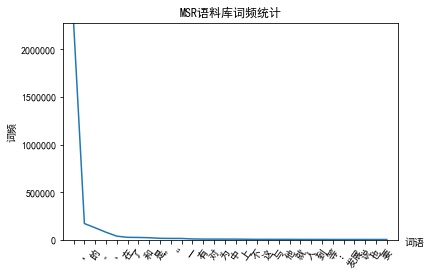

In [18]:
def plot(token_counts, title='MSR语料库词频统计', ylabel='词频'):
    from matplotlib import pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    fig = plt.figure(
        # figsize=(8, 6)
    )
    ax = fig.add_subplot(111)
    token_counts = list(zip(*token_counts))
    num_elements = np.arange(len(token_counts[0]))
    top_offset = max(token_counts[1]) + len(str(max(token_counts[1])))
    ax.set_title(title)
    ax.set_xlabel('词语')
    ax.set_ylabel(ylabel)
    ax.xaxis.set_label_coords(1.05, 0.015)
    ax.set_xticks(num_elements)
    ax.set_xticklabels(token_counts[0], rotation=55, verticalalignment='top')
    ax.set_ylim([0, top_offset])
    ax.set_xlim([-1, len(token_counts[0])])
    rects = ax.plot(num_elements, token_counts[1], linewidth=1.5)
    plt.show()


word_freq = f.most_common(30)
print(word_freq)
plot(word_freq)
# log_word_freq = []
# for w, f in word_freq:
#     log_word_freq.append((w, np.log(f)))
# plot(log_word_freq, ylabel='词频的对数')

## 2.2 词典
词典文档，词典中包括很多词，以及每个词对应的词义，词性等属性，分词就是通过词典来实现的

In [21]:
import os
print(os.path.abspath('.'))

E:\王泓儒\NLP\练习代码\Untitled Folder


加载迷你词典

In [25]:
def load_dictionary():
    """
    加载HanLP中的mini词库
    :return: 一个set形式的词库
    """
    #JClass是是连通python和java的桥梁，用来根据java路径名得到一个python类
    IOUtil = JClass('com.hankcs.hanlp.corpus.io.IOUtil')                 #利用JClass取得HanLP中的IOUtil工具类（利用JClass在Python中调用Java工具包）
    path = HanLP.Config.CoreDictionaryPath.replace('.txt', '.mini.txt')  #取得了HanLP的配置项Config中的词典路径（path）
    dic = IOUtil.loadDictionary([path])                                  #调用IOUtil的静态方法loadDictionary
    #去重 
    return set(dic.keySet())                                             #set函数：创建一个无序不重复的元素集



In [23]:
 dic = load_dictionary()
 dic

{'平津战役',
 '看报',
 '无耻之尤',
 '卡迪拉克',
 '新西兰',
 '表针',
 '陆战',
 '标签',
 '唱红脸',
 '桥台',
 '沙龙',
 '西宫',
 '大街小巷',
 '巷子',
 '干鲜果品',
 '蚊',
 '难听',
 '立下',
 '最惠国',
 '止步',
 '鉴',
 '悍然',
 '演说',
 '讲题',
 '杏林',
 '乐于',
 '十年九旱',
 '河西区',
 '如梭',
 '敌分我袭',
 '忘掉',
 '振幅',
 '区间车',
 '世贸',
 '从教',
 '丙种射线',
 '银白',
 '自治机关',
 '马裤',
 '图兰朵',
 '对称轴',
 '壁挂',
 '开花结实',
 '寓',
 '左轮',
 '生命',
 '定名',
 '轮辐',
 '集邮品',
 '带头羊',
 '精通',
 '周五',
 '以上者',
 '分库',
 '窖藏',
 '救苦救难',
 '察微知晓',
 '戏谑',
 '当家',
 '简洁明了',
 '优雅',
 '心慈手软',
 '鹤嘴镐',
 '铁甲舰',
 '黄骠马',
 '熬',
 '于林庄村',
 '勘误表',
 '美学家',
 '按语',
 '人生观',
 '立法会',
 '抹鼻子',
 '核心',
 '行帮',
 '不外乎',
 '铺户',
 '银票',
 '外道',
 '开船',
 '早熟',
 '众擎易举',
 '李时珍',
 '邮电所',
 '手册',
 '山丹丹花',
 '底牌',
 '边际',
 '牲粉',
 '网景',
 '骨科',
 '胰',
 '阴晴寒暑',
 '美展',
 '白班',
 '售出',
 '夸口',
 '圆点',
 '帱',
 '出版局',
 '衰',
 '房地产商',
 '针砭',
 '难说话',
 '生产经营性',
 '苦差',
 '胎儿',
 '妙算',
 '长谷',
 '打磨器',
 '干干脆脆',
 '委员',
 '鐾',
 '上劲',
 '倒阁',
 '会演',
 '变流器',
 '同音字',
 '哈巴狗',
 '溧阳',
 '共青团',
 '焦黄',
 '俄顷',
 '润笔',
 '电铃',
 '功德碑',
 '花生',
 '中饭',
 '计算',
 '赶跑',
 '飞来石',
 '黄皮寡瘦',
 '蘩',
 '主

In [76]:
print(len(dic))
print(list(dic)[0])

85584
锤头


## 2.3 切分算法

### 2.3.1 完全切分算法
完全切分算法：切分出一段文本中的所有单词

In [35]:
#完全切分很容易实现，只要便利文本中的连续序列，查询该序列是否在词典中即可

def fully_segment(text, dic):
    word_list = []
    for i in range(len(text)):                  # i 从 0 到text的最后一个字的下标遍历
        for j in range(i + 1, len(text) + 1):   # j 遍历[i + 1, len(text)]区间
            word = text[i:j]                    # 取出连续区间[i, j]对应的字符串
            if word in dic:                     # 如果在词典中，则认为是一个词
                word_list.append(word)
    return word_list

dic = load_dictionary()
print(fully_segment('研究生命起源', dic))

['研', '研究', '研究生', '究', '生', '生命', '命', '起', '起源', '源']


### 2.3.2 正向最长匹配
正向最长匹配：从前到后，依次输出可能的最长单词

In [44]:
def forward_segment(text, dic):
    word_list = []
    i = 0
    while i < len(text):
        longest_word = text[i]                      # 当前扫描位置的单字
        for j in range(i + 1, len(text) + 1):       # 所有可能的结尾
            word = text[i:j]                        # 从当前位置到结尾的连续字符串
            if word in dic:                         # 在词典中
                if len(word) > len(longest_word):   # 并且更长
                    longest_word = word             # 则更优先输出
        word_list.append(longest_word)              # 输出最长词
        i += len(longest_word)                      # 正向扫描
    return word_list


dic = load_dictionary()
print(forward_segment('研究生命起源', dic))

['研究生', '命', '起源']


这里“研究生”被分成了单独的一个词，并不符合分词的期望，需要用逆向最长匹配

### 2.3.3 逆向最长匹配
逆向最长匹配：从后到前，依次输出可能的最长单词

In [37]:
def backward_segment(text, dic):
    word_list = []
    i = len(text) - 1
    while i >= 0:                                   # 扫描位置作为终点
        longest_word = text[i]                      # 扫描位置的单字
        for j in range(0, i):                       # 遍历[0, i]区间作为待查询词语的起点
            word = text[j: i + 1]                   # 取出[j, i]区间作为待查询单词
            if word in dic:
                
                #直到找到最长的才加入word_list
                if len(word) > len(longest_word):   # 越长优先级越高
                    longest_word = word
                    break
        word_list.insert(0, longest_word)           # 逆向扫描，所以越先查出的单词在位置上越靠后
        i -= len(longest_word)
    return word_list


dic = load_dictionary()
print(backward_segment('研究生命起源', dic))

['研究', '生命', '起源']


### 2.3.4 双向最长匹配
双向最长匹配：同时执行正向和逆向  
（1）如果两者词数不同，则返回词数更少的哪一个  
（2）如果两者词数相同，则返回两者中单字更少的那个  
（3）如果单字数目也相同，就返回逆向最长匹配的结果

In [38]:
def count_single_char(word_list: list):  # 统计单字成词的个数
    return sum(1 for word in word_list if len(word) == 1)  #这里表示满足len(word) == 1 就返回1，sum方法会统计返回1的情况有多少次


def bidirectional_segment(text, dic):
    f = forward_segment(text, dic)
    b = backward_segment(text, dic)
    if len(f) < len(b):                                  # 词数更少优先级更高
        return f
    elif len(f) > len(b):
        return b
    else:
        if count_single_char(f) < count_single_char(b):  # 单字更少优先级更高
            return f
        else:
            return b                                     # 都相等时逆向匹配优先级更高



dic = load_dictionary()
print(bidirectional_segment('研究生命起源', dic))

['研究', '生命', '起源']


### 对比测试

In [40]:
test_str = ['项目的研究','商品和服务','研究生命起源','当下雨天地面积水','结婚的和尚未结婚的','欢迎新老师生前来就餐']

In [48]:
test_result = []
for f in [forward_segment,backward_segment,bidirectional_segment]:      #py列表里可以放方法
    test_result.append([f(s,dic) for s in test_str])
df = pd.DataFrame(test_result,index = ['forward','backward','bidirectional'])
df.T

,forward,backward,bidirectional
0,"[项目, 的, 研究]","[项, 目的, 研究]","[项, 目的, 研究]"
1,"[商品, 和服, 务]","[商品, 和, 服务]","[商品, 和, 服务]"
2,"[研究生, 命, 起源]","[研究, 生命, 起源]","[研究, 生命, 起源]"
3,"[当下, 雨天, 地面, 积水]","[当, 下雨天, 地面, 积水]","[当下, 雨天, 地面, 积水]"
4,"[结婚, 的, 和尚, 未, 结婚, 的]","[结婚, 的, 和, 尚未, 结婚, 的]","[结婚, 的, 和, 尚未, 结婚, 的]"
5,"[欢迎, 新, 老师, 生前, 来, 就餐]","[欢, 迎新, 老, 师生, 前来, 就餐]","[欢, 迎新, 老, 师生, 前来, 就餐]"


上面结果得出结论：不一定哪种分词方法就是最优的

### 2.3.5 速度评测

词典分词的核心价值不在精度，在速度

In [93]:
import time
def evaluate_speed(segment, text, dic):
    start_time = time.time()
    for i in range(pressure):
        segment(text, dic)
    elapsed_time = time.time() - start_time
    print('%.2f 万字/秒' % (len(text) * pressure / 10000 / elapsed_time))


    
text = "江西鄱阳湖干枯，中国最大淡水湖变成大草原"
pressure = 10000
dic = load_dictionary()

print('由于JPype调用开销巨大，以下速度显著慢于原生Java')
evaluate_speed(forward_segment, text, dic)
evaluate_speed(backward_segment, text, dic)
evaluate_speed(bidirectional_segment, text, dic)
print('由此可见，双向匹配最快，大概是正向和逆向的1/2，因为双向做了两倍的工作')

由于JPype调用开销巨大，以下速度显著慢于原生Java
67.30 万字/秒
65.53 万字/秒
29.06 万字/秒
由此可见，双向匹配最快，大概是正向和逆向的1/2，因为双向做了两倍的工作


**同等情况下，Python运行速度比Java慢，效率只有Java的一半不到**  
**正向和逆向速度差不多**  
**双向由于做了两倍的工作，速度大约是正向和逆向的2倍**

## 2.4 字典树  
有序集合（TreeMap）时间复杂度$O(logn)$  
散列表（Java的HashMap，Python的dict），账面上的时间复杂度下降了，但空间复杂度缺上去了  
  
字典树是一种速度快，内存省的数据结构，很符合预期

In [95]:
class Node(object):
    def __init__(self, value) -> None:
        self._children = {}
        self._value = value

    def _add_child(self, char, value, overwrite=False):
        child = self._children.get(char)
        if child is None:
            child = Node(value)
            self._children[char] = child
        elif overwrite:
            child._value = value
        return child


class Trie(Node):
    def __init__(self) -> None:
        super().__init__(None)

    def __contains__(self, key):
        return self[key] is not None

    def __getitem__(self, key):
        state = self
        for char in key:
            state = state._children.get(char)
            if state is None:
                return None
        return state._value

    def __setitem__(self, key, value):
        state = self
        for i, char in enumerate(key):
            if i < len(key) - 1:
                state = state._add_child(char, None, False)
            else:
                state = state._add_child(char, value, True)


trie = Trie()
# 增
trie['自然'] = 'nature'
trie['自然人'] = 'human'
trie['自然语言'] = 'language'
trie['自语'] = 'talk	to oneself'
trie['入门'] = 'introduction'
assert '自然' in trie
# 删
trie['自然'] = None
assert '自然' not in trie
# 改
trie['自然语言'] = 'human language'
assert trie['自然语言'] == 'human language'
# 查
assert trie['入门'] == 'introduction'

### 2.4.2字典树的结点实现

In [3]:
class Node(object):
    def __init__(self, value) -> None:
        self._children = {}
        self._value = value

    def _add_child(self, char, value, overwrite=False):
        child = self._children.get(char)
        if child is None:
            child = Node(value)
            self._children[char] = child
        elif overwrite:
            child._value = value
        return child


class Trie(Node):
    def __init__(self) -> None:
        super().__init__(None)

    def __contains__(self, key):
        return self[key] is not None

    def __getitem__(self, key):
        state = self
        for char in key:
            state = state._children.get(char)
            if state is None:
                return None
        return state._value

    def __setitem__(self, key, value):
        state = self
        for i, char in enumerate(key):
            if i < len(key) - 1:
                state = state._add_child(char, None, False)
            else:
                state = state._add_child(char, value, True)


if __name__ == '__main__':
    trie = Trie()
    # 增
    trie['自然'] = 'nature'
    trie['自然人'] = 'human'
    trie['自然语言'] = 'language'
    trie['自语'] = 'talk	to oneself'
    trie['入门'] = 'introduction'
    assert '自然' in trie
    # 删
    trie['自然'] = None
    assert '自然' not in trie
    # 改
    trie['自然语言'] = 'human language'
    assert trie['自然语言'] == 'human language'
    # 查
    assert trie['入门'] == 'introduction'